# Opsætining af pakker og plotting parameters

In [125]:
#Importerer pakker
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, e, m_e #Fysiske konstanter
from sympy import symbols, exp, cos, sin, Eq
import sympy as sp
import locale
import uncertainties as unc
from scipy.optimize import curve_fit
plt.rcParams["font.size"] = 15

#Komma som decimalseperator
locale.setlocale(locale.LC_NUMERIC, "de_DE")
plt.rcdefaults()
plt.rcParams['axes.formatter.use_locale'] = True

# Grafisk og numerisk bestemmelse af tilladte energiniveauer

C:\Users\TucaC\AppData\Local\Temp\ipykernel_27460\3109391454.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.tan(alpha(E) * L / 2) - kappa(E) / alpha(E)
C:\Users\TucaC\AppData\Local\Temp\ipykernel_27460\3109391454.py:19: RuntimeWarning: divide by zero encountered in divide
  return -1 / np.tan(alpha(E) * L / 2) - kappa(E) / alpha(E)
C:\Users\TucaC\AppData\Local\Temp\ipykernel_27460\3109391454.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  return np.tan(alpha(E) * L / 2) - kappa(E) / alpha(E)
C:\Users\TucaC\AppData\Local\Temp\ipykernel_27460\3109391454.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  return -1 / np.tan(alpha(E) * L / 2) - kappa(E) / alpha(E)


Fundne energiniveauer (eV): [0.0119892  0.04744949 0.10438439 0.1757939 ]


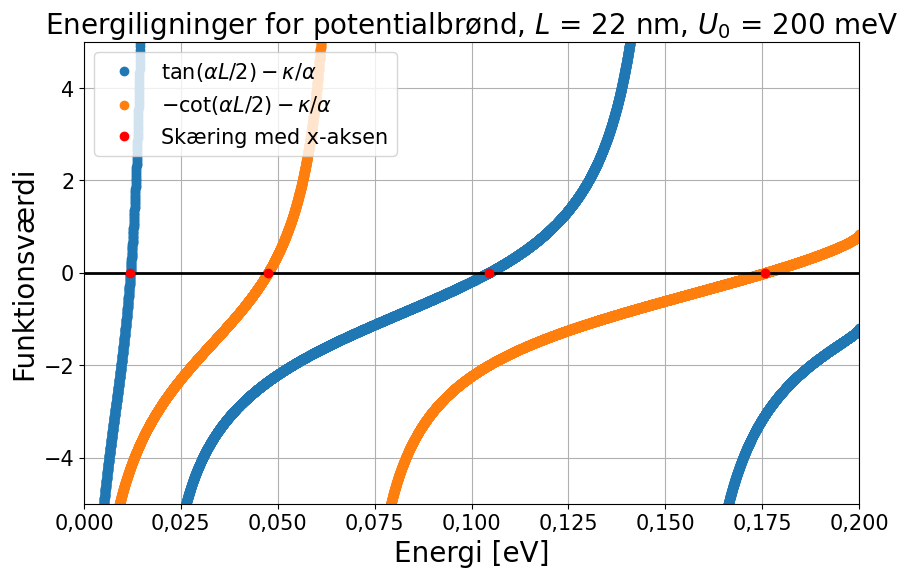

In [126]:
#Første to dele kan køres sammen for at bestemme tilladte energier for vilkårlige bredder og dybder af potentialbrønd
# Parametre for kvantebrønden
m_e_eff = 0.046 * m_e  # Effektiv elektronmasse (i kg)
U0 = 200e-3 * e  # Brønddybde i Joule (omregnet fra eV)
L = 22e-9  # Brøndbredde i meter (nm til m)

# Definer funktionerne

def alpha(E):
    return np.sqrt(2 * m_e_eff * E) / hbar

def kappa(E):
    return np.sqrt(2 * m_e_eff * (U0 - E)) / hbar

def tan_eq(E):
    return np.tan(alpha(E) * L / 2) - kappa(E) / alpha(E)

def cot_eq(E):
    return -1 / np.tan(alpha(E) * L / 2) - kappa(E) / alpha(E)

# Definer energiområde, udelukkende til plotting
E_values = np.linspace(0, U0, 10000)  # Energier fra 0 til U0

tan_values = tan_eq(E_values) #Definerer y-værdier
cot_values = cot_eq(E_values) #Definerer y-værdier

def bisection(func, a, b, tol=1e-6, max_iter=100000): #Definerer bisektionsmeteoden, tolerencen er hvor tæt på 0 vi vil acceptere som en rod
    fa = func(a) #Definerer f(a)
    fb = func(b) #Definerer f(b)
    if fa * fb > 0: #Hvis f(a)*f(b) ikke er et negativt tal er der ikke en rod mellem a og b
        return None
    #else
    for i in range(max_iter): #Gentager kun algoritmen max_iter gange
        c = (a + b) / 2.0 #Definerer et punkt mellem a og b
        fc = func(c) #Funktionsværdien af c
        if abs(fc) < tol: #Hvis funktionsværdien er lavere end tolerancen
            return c #Så er c en rod
        elif fa * fc < 0: #Hvis funktionsværdien af a og c er negativ er der en rod imellem a og c
            b = c #definerer b på ny
            fb = fc #og f(b) på ny
        else: 
            a = c #Ellers redefineres a til c
            fa = fc #og f(a) til f(c)
    return (a + b) / 2.0 #Hvis tolerancen ikke er nået endnu returnere den punktet mellem a og b efter max_iter iterationer

def find_energy_levels(): #Definerer funktion der skal finde energiniveauerne
    E_initial_guesses = np.linspace(0, U0, 1000) #Vores gæt er værdier mellem 0 og U0
    solutions = [] #Tom liste til vores tilladte energiniveauer
    tol = 1*-1e100 #Arbitrært valgt toleranece. Den skal bare være lille så vi kun får en enkelt skæring med x-aksen for hver energi (fortsættes)
    #ellers gør den numeriske natur af algoritmen at der kommer flere tal der ligner hinanden. Den skal dog stadig være så stor at skæringen,
    # der hvor python tvinger trigonometriske funktioner til at være kontinuert ikke medtages. Der skal være lige mange grafiske og numeriske løsninger
    functions = [tan_eq, cot_eq] #Vi har to funktioner vi vil finde rødder for så vi er nødt til at lave en liste med dem
    
    for f in functions: #itererer over funktionerne
        for i in range(len(E_initial_guesses) - 1): #Itererer over vores gæt som er alle de energier der findes mellem 0 og U0
            a = E_initial_guesses[i] #Vores a 
            b = E_initial_guesses[i + 1] #vores b. Vi håber der er en rod mellem a og b
            if f(a) * f(b) < 0:  #Hvis de to funktionsværdier ganget hinanden er mindre end 0 må der være en rod igen
                sol = bisection(f, a, b, tol=tol) #Hvis der er en rod mellem vores to gæt nu, så startes bisektionsalgoritmen
                if sol is not None and 0 < sol < U0: #Vi skal være sikker på at løsningen ligger mellem 0 og U0, cotangens og tangens har også områder de er udefineret, disse None løsninger vil vi ikke have i vores array.
                    if f(a)< 0 and f(b)>0: #Sikrer sig at vi har a på venstre side af skæring og omvendt b på højre side
                        if all(abs(sol - s) > tol for s in solutions): #Forskellen mellem alle løsninger fundet indtil videre og den nye løsningen skal være større end vores tolerance
                            solutions.append(sol) #Hvis dette krav er opfyldt anser vi det til at være et tilladt energiniveau.
    
    return np.sort(np.array(solutions) / e) # Fra joule til eV, sorteret så løsninger er n = 1,2 ,3 ,.., n
energy_levels = find_energy_levels()
print("Fundne energiniveauer (eV):", energy_levels)


# Plots
plt.figure(figsize=(10,6))
plt.plot(E_values / e, tan_values, label=r'$\tan(\alpha L/2) - \kappa/\alpha$', linestyle = "",marker = 'o')
plt.plot(E_values / e, cot_values, label=r'$-\cot(\alpha L/2) - \kappa/\alpha$', linestyle = "",  marker = 'o')
plt.axhline(0, color='black', linewidth=2)
plt.xlabel('Energi [eV]', size = 20)
plt.ylabel('Funktionsværdi', size = 20)
plt.title(f'Energiligninger for potentialbrønd, $L$ = {L *1e9:.0f} nm, $U_0$ = {((U0*1e3)/e):.0f} meV', size = 20)

plt.tick_params(axis = 'both', labelsize = 15)
plt.xlim(0, U0 / e)
plt.ylim(-5, 5)
plt.grid()

#Plotter skæringspunkterne
count = 0 #init counter
for energy in energy_levels:
    count += 1 #starter med n = 1
    energy_joules = energy * e  # Convert eV to Joules
    if count % 2 == 0: #Hvis n er delbart med to er løsningen antisymmetrisk
        if count == 2: #Første gang vil vi gerne lige lave en legend til skæringspunkterne
            plt.plot(energy, cot_eq(energy_joules), marker='o', color="r", linestyle = "", label = "Skæring med x-aksen") #Kun ved n=2
        else: 
            plt.plot(energy, cot_eq(energy_joules), marker='o', color="r", linestyle = "") #Alle andre lige n
    else:
        plt.plot(energy, tan_eq(energy_joules), marker='o', color="r") #Ulige n
plt.legend(prop={'size': 15})


plt.show()

# Udregning og plotting af bølgefunktioner i potentialbrønd

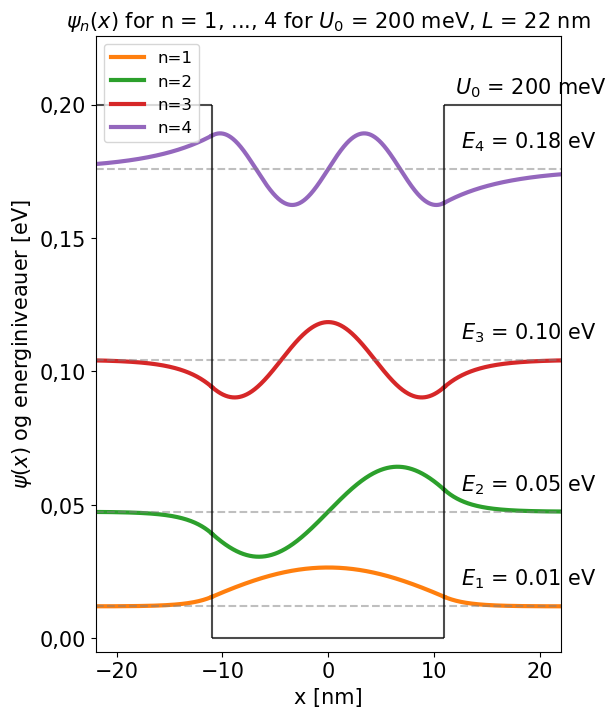

In [127]:
# Initierer plot
fig, ax1 = plt.subplots(figsize=(6, 8))

# Itererer over energierne fra og giver dem et tilhørende n
for n, E in enumerate(energy_levels*e, start=1):
    # Bestemmelse af alpha og kappa for givet energiniveau
    a = np.sqrt(2 * m_eff * E) / hbar  # Alpha - svarer til inde i brønden
    kappa = np.sqrt(2 * m_eff * (U0 - E)) / hbar  # Kappa - svarer til udenfor brønden

    # Symboler til ligninger
    A, C, x = symbols("A C x")
    if n % 2 != 0:  # For ulige n, dvs symmetriske løsninger (Laveste energitilstand er altid den symmetriske løsning)
        # Integrerer funktionerne fra -oo til -L/2 derfra til L/2 og derfra til oo
        led1 = sp.integrate((C * exp(x * kappa))**2, (x, -sp.oo, -L/2))
        led3 = sp.integrate((C * exp(-x * kappa))**2, (x, L/2, sp.oo))
        led2 = sp.integrate((A * cos(a * x))**2, (x, -L/2, L/2))

        # Den stykvist integrerede bølgefunktion lægges sammen, den skal være lige 1 for at være normaliseret
        udtryk = Eq(1, led1 + led2 + led3)

        # Grænsebetingelse, se rapport
        Eq1 = Eq(C * exp(-L * kappa / 2), A * cos(-L * a / 2))

        # Bestemmer Normaliseringskonstanter
        sol = sp.solve([udtryk, Eq1], (A, C))

        # Stykvis definition af bølgefunktionen
        def psi1(x):  # Dvs før brønden
            C_val = sol[1][0] / 60 #C-værdien vælges - Den er skaleret ned med en størrelse så amplituderne passer flot ind på plottet
            # Dette er naturligvis gjort for alle amplituder
            return (C_val * np.exp(x * kappa)) #Funktionen
        
        #Det samme gentages for efter og i brønden
        def psi3(x):  # Efter brønden
            C_val = sol[1][0] / 60
            return (C_val * np.exp(-x * kappa))

        def psi2(x):  # I brønden
            A_val = sol[1][0] / 60
            return (A_val * cos(a * x))
        
        # Definerer x og psi(x) for hvert område
        x1 = np.linspace(-(L*2), -L/2, 1000) #I princippet fra -oo til -L/2
        y1 = np.array([psi1(i) for i in x1]) #Psi(x) gennemløber x

        x2 = np.linspace(-L/2, L/2, 1000)
        y2 = np.array([psi2(i) for i in x2])

        x3 = np.linspace(L/2, L*2, 1000) #I princippet L/2 til oo
        y3 = np.array([psi3(i) for i in x3])
        
        #Når vi vælger amplituderne, gør vi det fra en liste af mulige løsninger, vi ved i princippet ikke om en løsning er mere korrekt
        #For at tage højde for dette, siger vi at sidste værdi i psi1 skal have samme værdi som første i psi2, og ligeledes på den modsatte side af brønden
        #Dette sikrer også at der er det samme fortegn over grænsen (Kun relevant for antisymmetriske løsninger)
        A_norm = y2[0] / y1[-1] #Har ikke noget at gøre med normaliseringskonstanterne A og C
        C_norm = y2[-1] / y3[0]
        #print(A_norm), print(C_norm) 
        #Printer man Faktorne kan man se de er ens, det er altså bare en størrelse der sikrer amplituder bliver korrekte
    
        y1 = np.array([val * A_norm for val in y1]) #Y-værdier i halerne ganges op til den rigtige størrelse
        y3 = np.array([val * C_norm for val in y3])

    else:  # For de antisymmetriske, fremgangsmåden er ens

        led1 = sp.integrate((C * exp(x * kappa))**2, (x, -sp.oo, -L/2))
        led3 = sp.integrate((C * exp(-x * kappa))**2, (x, L/2, sp.oo))
        led2 = sp.integrate((A * cos(a * x))**2, (x, -L/2, L/2))

        
        udtryk = Eq(1, led1 + led2 + led3)

        
        Eq1 = Eq(C * exp(-L * kappa / 2), A * sin(-L * a / 2))

        
        sol = sp.solve([udtryk, Eq1], (A, C))

        
        def psi1(x):
            C_val = sol[1][0] / 60
            return (C_val * np.exp(x * kappa))

        def psi3(x):
            C_val = sol[1][0] / 60
            return (C_val * np.exp(-x * kappa))

        def psi2(x):
            A_val = sol[1][0] / 60
            return (A_val * sin(a * x))

        x1 = np.linspace(-(L*2), -L/2, 1000)
        y1 = np.array([psi1(i) for i in x1])

        x2 = np.linspace(-L/2, L/2, 1000)
        y2 = np.array([psi2(i) for i in x2])

        x3 = np.linspace(L/2, L*2, 1000)
        y3 = np.array([psi3(i) for i in x3])

 
        A_norm = y2[0] / y1[-1]
        C_norm = y2[-1] / y3[0]
    
        y1 = np.array([val * A_norm for val in y1])
        y3 = np.array([val * C_norm for val in y3])

    # Plotter de tre bølgefunktioner
    ax1.plot(x2 * 1e9, y2 / 10000 + E / e, label=f'n={n}', color=f'C{n}', linewidth = 3) #Brønden
    ax1.plot(x1 * 1e9, y1 / 10000 + E / e, color=f'C{n}', linewidth = 3)  # Eksponentielt aftagende venstre
    ax1.plot(x3 * 1e9, y3 / 10000 + E / e, color=f'C{n}', linewidth = 3)  # Eksponentielt aftagende højre

    # Horizontal linje for at vise hvordan bølgefunktionen går mod 0 uden for brønden
    ax1.axhline(E / e, color='gray', linestyle='--', alpha=0.5)
    ax1.text(L*1e9/2+1.6,E/e+0.008, f"$E_{n}$ = {(E/e):.2f} eV", fontsize=15) #Annotering af energiniveau

# Afgrænsning af brønden ved x=-L/2 og x=L/2 og potentialet U0
ax1.vlines(-L*1e9/2, 0, U0/e, color='black', linestyle='-', alpha=0.7)
ax1.vlines(L*1e9/2, 0, U0/e, color='black', linestyle='-', alpha=0.7)
ax1.hlines(U0, -L*1e9/2, L*1e9/2, color='black', linestyle='-', alpha=0.7)
ax1.hlines(U0/e, -L*1e9, -L*1e9/2,  color='black', linestyle='-', alpha=0.7)
ax1.hlines(U0/e, L*1e9/2, L*1e9,  color='black', linestyle='-', alpha=0.7)
ax1.text(L*1e9/2+1,U0/e+0.004, f"$U_0$ = {(U0*1e3)/e:.0f} meV", fontsize=15)


# Akser osv
ax1.set_xlabel("x [nm]", size = 15)
ax1.set_ylabel(f"$\psi (x)$ og energiniveauer [eV]", size =15)
ax1.set_title(f"$\psi _n (x)$ for n = 1, ..., {len(energy_levels)} for $U_0$ = {(U0*1e3)/e:.0f} meV, $L$ = {L*1e9:.0f} nm", size = 15)
ax1.legend(fontsize = 12 ,loc = "upper left")
ax1.set_ylim(-0.005,0.175793 + 0.0500)
ax1.tick_params("both", labelsize=15)
ax1.set_xlim(-L*1e9, L*1e9)

plt.show()

# Datanalyse fra forsøget

Peak 1: Mean = 1528.59 nm, Std Dev = 52.51 nm
Peak 2: Mean = 1595.70 nm, Std Dev = 16.21 nm
Længde 1: Mean = 3.174377798734252e-09 m, Std Dev = 5.452736804641791e-11
Længde 2: Mean = 3.243311838576427e-09 m, Std Dev = 1.6472312721700724e-11


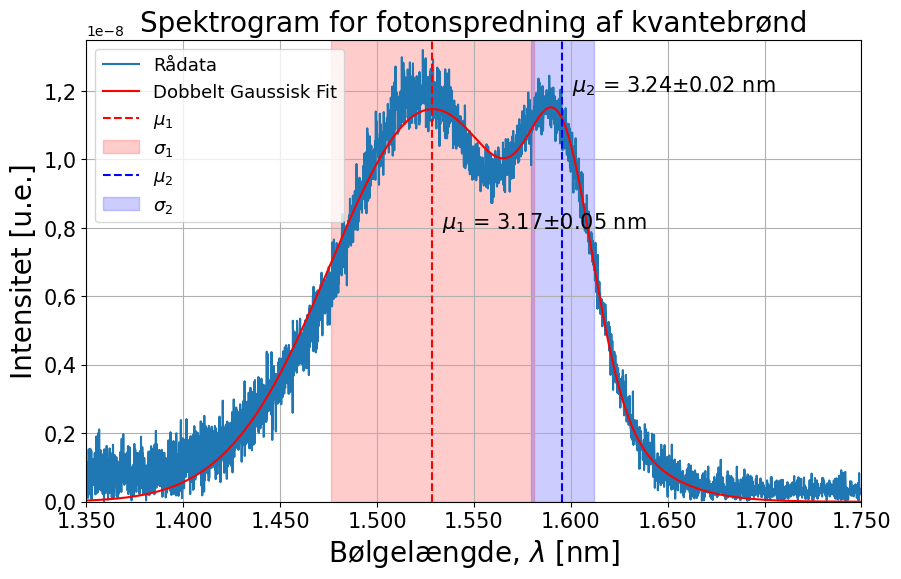

In [128]:
def calc_L(l, sigma=0, n=1, me=9.11*10**(-31)*0.046, c=3*10**(8), h=6.63*10**(-34)):
    hbar = h/(2*np.pi)
    l = unc.ufloat(l, sigma)
    E = h*c/l
    # Formler:
    #   E = n^2 * pi^2 * hbar^2 / 2 * m * L^2
    #   L = sqrt(n^2 * pi^2 * hbar^2 / 2 * m * E)
    L = (((n**2) * (np.pi**2) * (hbar**2))/(2 * me * E))**(0.5)
    return [L.n, L.s] 

file = "./gruppe_12_Pr.csv" # csv fil skal være i samme directory

# Open fil
with open(file) as f:
    data = f.read().splitlines()
data = data[79:-1]

wavelengths = []
intensity = []

for n in data:
    x = float(n.split(",")[0])
    y = float(n.split(",")[1])

    wavelengths.append(x)
    intensity.append(y)

wavelengths = np.array(wavelengths)
intensity = np.array(intensity)


fig, ax = plt.subplots(figsize=(10,6))

def double_gaussian(x, mu1, sigma1, A1, mu2, sigma2, A2):
    return A1 * np.exp(-(x - mu1)**2 / (2 * sigma1**2)) + A2 * np.exp(-(x - mu2)**2 / (2 * sigma2**2))

# Setup af startgæt
initial_guess = [1500, 10, 1, 1600, 10, 1]

params, covariance = curve_fit(double_gaussian, wavelengths, intensity, p0=initial_guess, maxfev = 100000)

# Peaks og usikkerheder fra fit
mu1, sigma1, A1, mu2, sigma2, A2 = params
print(f"Peak 1: Mean = {mu1:.2f} nm, Std Dev = {sigma1:.2f} nm")
print(f"Peak 2: Mean = {mu2:.2f} nm, Std Dev = {sigma2:.2f} nm")
print(f"Længde 1: Mean = {calc_L(mu1*1*10**(-9), sigma1*10**(-9))[0]} m, Std Dev = {calc_L(mu1*1*10**(-9), sigma1*10**(-9))[1]}")
print(f"Længde 2: Mean = {calc_L(mu2*10**(-9), sigma2*10**(-9))[0]} m, Std Dev = {calc_L(mu2*10**(-9), sigma2*10**(-9))[1]}")

# plot af data og gauss fit
fitted_curve = double_gaussian(wavelengths, *params)
ax.plot(wavelengths, intensity, linestyle="solid", label="Rådata")
ax.plot(wavelengths, fitted_curve, label='Dobbelt Gaussisk Fit', color='red', linestyle="solid")



# Plt plot setup
titlesize = 20
ax.vlines(mu1, 0, 1, color="red", linestyle="dashed", label="$\\mu_1$")
ax.axvspan(mu1-sigma1, mu1+sigma1, alpha=0.2, color="red", label="$\\sigma_1$")
ax.vlines(mu2, 0, 1, color="blue", linestyle="dashed", label="$\\mu_2$")
ax.axvspan(mu2-sigma2, mu2+sigma2, alpha=0.2, color="blue", label="$\\sigma_2$")

ax.set_title("Spektrogram for fotonspredning af kvantebrønd", fontsize=titlesize)
ax.set_xlabel("Bølgelængde, $\\lambda$ [nm]", fontsize = 20)
ax.set_ylabel("Intensitet [u.e.]", fontsize = 20)
ax.set_xlim(1350,1750)
ax.set_ylim(0,1.35e-8)
ax.text(mu1+5, 0.8e-8, r"$\mu_1$ = "+str(round(calc_L(mu1*1*10**(-9), sigma1*10**(-9))[0]*1e9, 2))+"$\\pm$"+str(round(calc_L(mu1*1*10**(-9), sigma1*10**(-9))[1]*1e9, 2))+" nm", fontsize=15)
ax.text(mu2+5, 1.2e-8, r"$\mu_2$ = "+str(round(calc_L(mu2*1*10**(-9), sigma2*10**(-9))[0]*1e9, 2))+"$\\pm$"+str(round(calc_L(mu2*1*10**(-9), sigma2*10**(-9))[1]*1e9, 2))+" nm", fontsize=15)
ax.tick_params("both", labelsize=15)
ax.grid()
ax.legend(fontsize=13, loc="upper left")
plt.show()